파이토치(PyTorch) 튜토리얼 <br>
https://tutorials.pytorch.kr/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

## 파이토치의 주요 특징

- 동적 계산 그래프(Dynamic Computational Graph): 파이토치는 계산 그래프를 생성하고 수정할 수 있는 동적 계산 그래프를 사용. 이는 모델의 복잡한 흐름과 제어 흐름을 쉽게 구현할 수 있도록 도와준다. 이러한 특징은 딥러닝 모델의 구성과 실험 과정에서 유연성을 제공.

- 자동 미분(Automatic Differentiation): 파이토치는 자동 미분 기능을 제공하여 계산 그래프 상에서의 역전파(Backpropagation)를 자동으로 처리. 이를 통해 모델의 가중치 업데이트를 간편하게 수행.

- 쉬운 인터페이스: 파이토치는 직관적이고 쉬운 인터페이스를 제공. PyTorch는 Pythonic한 구문과 함께 다양한 딥러닝 모델을 구성하고 학습시키는 데에 필요한 다양한 기능을 제공.

- GPU 지원: 파이토치는 GPU를 활용하여 딥러닝 모델의 학습과 추론을 가속화할 수 있다. GPU를 사용하면 대용량 데이터와 복잡한 모델에 대한 연산을 더욱 빠르게 처리.

## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능

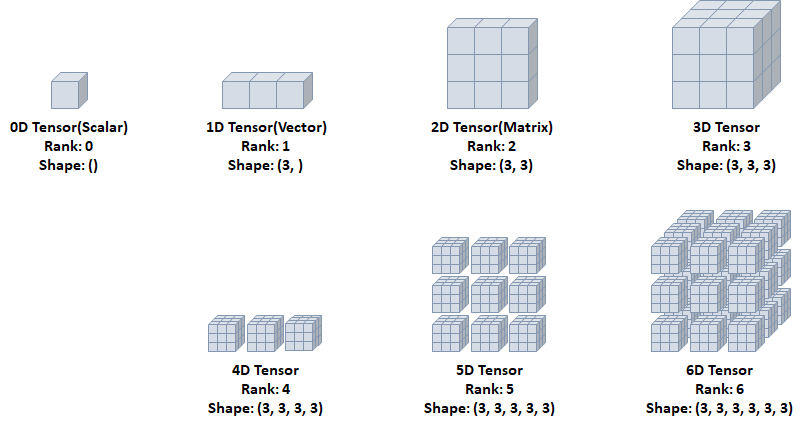

In [2]:
import torch
torch.__version__

'2.0.1+cu118'

### 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [3]:
x = torch.empty(4,2) # 텐서를 초기화하지 않고, 현재 메모리에 있는 임의의 값으로 채웁니다.
print(x)

tensor([[7.2709e-39, 4.4788e-41],
        [6.2964e-34, 0.0000e+00],
        [4.5696e-22, 4.4787e-41],
        [4.6136e-22, 4.4787e-41]])


In [ ]:
import numpy as np
x = np.empty([4,2]) # 지정된 크기의 배열을 생성하지만 초기화되지 않아 배열 요소에는 이전에 할당된 메모리에 저장된 임의의 값이 들어감
print(x)

[[6.42067318e-316 0.00000000e+000]
 [6.42655375e-316 6.42657905e-316]
 [6.42659169e-316 6.42675138e-316]
 [6.42672924e-316 6.42688497e-316]]


무작위로 초기화된 텐서

In [ ]:
x = torch.rand(4,2) # 0~1사이의 숫자를 균등하게 생성
print(x)

tensor([[0.6523, 0.3062],
        [0.4664, 0.3061],
        [0.9909, 0.3760],
        [0.6518, 0.6716]])


### PyTorch 데이터 타입

1. torch.float32 또는 torch.float: 32비트 부동 소수점 숫자를 나타냅니다. 기본적으로 사용되는 데이터 타입입니다.

2. torch.float64 또는 torch.double: 64비트 부동 소수점 숫자를 나타냅니다. 더 정확한 숫자 계산이 필요한 경우에 사용될 수 있습니다.

3. torch.float16 또는 torch.half: 반 정밀도 16비트 부동 소수점 숫자를 나타냅니다. 메모리를 적게 사용하며, 계산 속도도 빠릅니다. 그러나 정확도가 상대적으로 낮을 수 있습니다.

4. torch.int8, torch.int16, torch.int32, torch.int64: 정수 데이터 타입입니다. 각각 8비트, 16비트, 32비트, 64비트 크기를 가집니다.

5. torch.uint8: 8비트 부호 없는 정수 데이터 타입입니다. 0과 255 사이의 값을 가질 수 있습니다.

6. torch.bool: 불리언 데이터 타입으로, True 또는 False 값을 가집니다.



| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [4]:
x = torch.zeros(4,2,dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [5]:
x = torch.tensor([3,2.3])
print(x)

tensor([3.0000, 2.3000])


2 x 4 크기, double 타입, 1로 채워진 텐서

In [6]:
x = x.new_ones(2,4,dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [7]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[ 0.9084,  0.7653,  0.5053, -0.3592],
        [ 1.3568,  0.7751, -0.0490,  0.9293]])


In [8]:
x = torch.randn(5) # 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성
print(x)

tensor([ 0.5927,  2.2327, -1.5152,  1.4931,  1.4684])


텐서의 크기 계산

In [9]:
print(x.size())

torch.Size([5])


### 데이터 타입(Data Type)

In [10]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [11]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [12]:
it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [13]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensors

- `.to` 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

NVIDIA가 만든 병렬 컴퓨팅 플랫폼 및 API 모델로, 보통 '쿠다'라고 발음한다. CUDA 플랫폼은 GPU 의 가상 명령어셋을 사용할 수 있도록 만들어주는 소프트웨어 레이어이며, NVIDIA가 만든 CUDA 코어가 장착된 GPU에서 작동

In [14]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.5179])
-0.5178959369659424
torch.float32


In [3]:
a = torch.randn(10000000)
print(a.mean())
print(a.std())

tensor(0.0004)
tensor(1.0003)


In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### 다차원 텐서 표현

0D Tensor(Scalar)

* 하나의 숫자를 담고 있는 텐서(tensor)
* 축과 형상이 없음

In [4]:
t0 = torch.tensor(0)

print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


1D Tensor(Vector)

* 값들을 저장한 리스트와 유사한 텐서
* 하나의 축이 존재

In [5]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)

* 행렬과 같은 모양으로 두개의 축이 존재
* 일반적인 수치, 통계 데이터셋이 해당
* 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

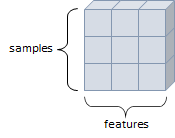

In [6]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


[과제]3D, 4D, 5D 텐서를 생성하세요.

3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

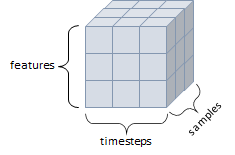

4D Tensor

* 4개의 축
* 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

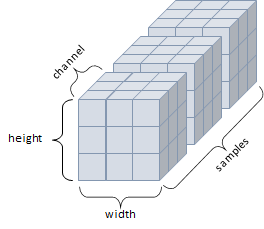

5D Tensor

* 5개의 축
* 비디오 데이터가 대표적인 사례
* 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

### 텐서의 연산(Operations)

* 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [8]:
# https://aigong.tistory.com/178
import math

a = torch.randn(1,2) * 2 - 1 # 가우시안 표준정규 분포
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a,-0.5,0.5))

# torch.clamp 함수는 주어진 텐서의 각 원소를 주어진 범위(min과 max)로 제한하는 함수
# 입력 값이 min < x(input) < max이면 x가 그대로 나오지만
# min 보다 작으면 min 값이, max 보다 크면 max 값이 나오는 구조입니다!

tensor([[ 0.2977, -1.4140]])
tensor([[0.2977, 1.4140]])
tensor([[ 1., -1.]])
tensor([[ 0., -2.]])
tensor([[ 0.2977, -0.5000]])


In [10]:
b = torch.randn(1,5) * 3 - 2
print(b)
print(torch.abs(b))
print(torch.ceil(b))
print(torch.floor(b))
print(torch.clamp(b,-5,5))

tensor([[-4.0868, -0.3889,  2.5136, -4.0822, -5.8691]])
tensor([[4.0868, 0.3889, 2.5136, 4.0822, 5.8691]])
tensor([[-4., -0.,  3., -4., -5.]])
tensor([[-5., -1.,  2., -5., -6.]])
tensor([[-4.0868, -0.3889,  2.5136, -4.0822, -5.0000]])


In [12]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a)) # 텐서 a의 모든 요소를 곱한 값을 출력
print(torch.unique(torch.tensor([1,2,3,1,2,1])))

tensor([[ 0.2977, -1.4140]])
tensor(-1.4140)
tensor(0.2977)
tensor(-0.5581)
tensor(1.2103)
tensor(-0.4209)
tensor([1, 2, 3])


`max`와 `min`은 `dim` 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax: 최대값을 가진 인덱스
- argmin: 최소값을 가진 인덱스



In [13]:
x = torch.rand(2,2) # 균등분포
print(x,'\n')
print(x.max(dim=0),'\n')
print(x.max(dim=1))

tensor([[0.2829, 0.6538],
        [0.1479, 0.6262]]) 

torch.return_types.max(
values=tensor([0.2829, 0.6538]),
indices=tensor([0, 0])) 

torch.return_types.max(
values=tensor([0.6538, 0.6262]),
indices=tensor([1, 1]))


In [14]:
x = torch.rand(2,2)
print(x,'\n')
print(x.min(dim=0),'\n')
print(x.min(dim=1))

tensor([[0.9506, 0.4723],
        [0.7388, 0.1128]]) 

torch.return_types.min(
values=tensor([0.7388, 0.1128]),
indices=tensor([1, 1])) 

torch.return_types.min(
values=tensor([0.4723, 0.1128]),
indices=tensor([1, 1]))


In [15]:
x = torch.rand(2,2) # 무작위로 생성된 행렬을 반환
print(x)
y = torch.rand(2,2)
print(y)

tensor([[0.6486, 0.0697],
        [0.3252, 0.8034]])
tensor([[0.1436, 0.4134],
        [0.7463, 0.2430]])


`torch.add`: 덧셈

In [16]:
print(x+y)
print(torch.add(x,y))

tensor([[0.7923, 0.4831],
        [1.0715, 1.0464]])
tensor([[0.7923, 0.4831],
        [1.0715, 1.0464]])


결과 텐서를 인자로 제공

In [17]:
result = torch.empty(2,4)
torch.add(x,y, out=result)
print(result)

tensor([[0.7923, 0.4831],
        [1.0715, 1.0464]])


<ipython-input-17-4be145b6d329>:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:26.)
  torch.add(x,y, out=result)


`in-place` 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [19]:
print(x)
print(y)
print()
y.add_(x) #  _가 있는 add_는 메서드가 y 자체를 변경한다는 의미이며 y의 값이 변경
print(y)

tensor([[0.6486, 0.0697],
        [0.3252, 0.8034]])
tensor([[0.7923, 0.4831],
        [1.0715, 1.0464]])

tensor([[1.4409, 0.5528],
        [1.3968, 1.8498]])


`torch.sub`: 뺄셈

In [20]:
print(x)
print(y)
print(x-y,'\n')
x.sub_(y)
print(x)
print(torch.sub(x,y))
print(x.sub(y))
print(x.sub(y))

tensor([[0.6486, 0.0697],
        [0.3252, 0.8034]])
tensor([[1.4409, 0.5528],
        [1.3968, 1.8498]])
tensor([[-0.7923, -0.4831],
        [-1.0715, -1.0464]]) 

tensor([[-0.7923, -0.4831],
        [-1.0715, -1.0464]])
tensor([[-2.2331, -1.0359],
        [-2.4683, -2.8962]])
tensor([[-2.2331, -1.0359],
        [-2.4683, -2.8962]])
tensor([[-2.2331, -1.0359],
        [-2.4683, -2.8962]])


`torch.mul`: 곱셉

In [ ]:
print(x)
print(y)
print(x*y)
x.mul_(y)
print(x)
print()
print(torch.mul(x,y))
print(x.mul(y))

tensor([[-1.2371,  0.2917],
        [-4.7027, -6.8134]])
tensor([[0.1406, 0.0311],
        [0.4940, 0.7570]])
tensor([[-0.1739,  0.0091],
        [-2.3230, -5.1577]])
tensor([[-0.1739,  0.0091],
        [-2.3230, -5.1577]])

tensor([[-2.4448e-02,  2.8168e-04],
        [-1.1475e+00, -3.9043e+00]])
tensor([[-2.4448e-02,  2.8168e-04],
        [-1.1475e+00, -3.9043e+00]])


`torch.div`: 나눗셈

In [21]:
print(x)
print(y)
print(x/y)
x.div_(y)
print(x)
print(torch.div(x,y))
print(x.div(y))

tensor([[-0.7923, -0.4831],
        [-1.0715, -1.0464]])
tensor([[1.4409, 0.5528],
        [1.3968, 1.8498]])
tensor([[-0.5498, -0.8739],
        [-0.7672, -0.5657]])
tensor([[-0.5498, -0.8739],
        [-0.7672, -0.5657]])
tensor([[-0.3816, -1.5809],
        [-0.5492, -0.3058]])
tensor([[-0.3816, -1.5809],
        [-0.5492, -0.3058]])


`torch.mm`: 내적(dot product)

torch.svd(z)는 변수 z의 특이값 분해를 출력.
- 특이값 분해는 행렬을 세 개의 행렬로 분해하는 기법으로, A = UΣVT 형태로 분해. U, Σ, V는 각각 특이벡터(U), 대각행렬(Σ), 전치된 특이벡터(VT)

- 이 코드는 주어진 행렬 x와 y를 곱하고, 곱한 결과 행렬 z에 대해 특이값 분해를 수행하여 특이값, 특이벡터, 그리고 전치된 특이벡터를 출력. 특이값 분해는 다양한 응용 분야에서 사용되는 중요한 행렬 분해 기법.

In [23]:
print(x)
print(y,'\n')
print(torch.matmul(x,y))
z = torch.mm(x,y)
print(z,'\n')
print(torch.svd(z)) # singular value decomposition A = U 시그마 VT

tensor([[-0.5498, -0.8739],
        [-0.7672, -0.5657]])
tensor([[1.4409, 0.5528],
        [1.3968, 1.8498]]) 

tensor([[-2.0129, -1.9206],
        [-1.8955, -1.4705]])
tensor([[-2.0129, -1.9206],
        [-1.8955, -1.4705]]) 

torch.return_types.svd(
U=tensor([[-0.7576, -0.6527],
        [-0.6527,  0.7576]]),
S=tensor([3.6690, 0.1854]),
V=tensor([[ 0.7529, -0.6582],
        [ 0.6582,  0.7529]]))


### 텐서의 조작(Manipulations)

인덱싱(Indexing): NumPy처럼 인덱싱 형태로 사용가능

In [24]:
import torch
x = torch.Tensor([[1,2],[3,4]])
print(x)

print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1])
print(x[:,0])
print(x[:,1])
print(x[0,:])
print(x[1,:])

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


https://bigdatadiary0819.tistory.com/60

º 랜덤한 값을 가지는 텐서 생성

1. torch.rand() : 0과 1 사이의 숫자를 균등하게 생성

2. torch.rand_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

3. torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성

4. torch.randn_like() :  사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.randint() : 주어진 범위 내의 정수를 균등하게 생성

6. torch.randint_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

7. torch.randperm() : 주어진 범위 내의 정수를 랜덤하게 생성

º 특정한 값을 가지는 텐서 생성

1. torch.arange() : 주어진 범위 내의 정수를 순서대로 생성

2. torch.ones() : 주어진 사이즈의 1로 이루어진 텐서 생성

3. torch.zeros() : 주어진 사이즈의 0으로 이루어진 텐서 생성

4. torch.ones_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.zeros_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

6. torch.linspace() : 시작점과 끝점을 주어진 갯수만큼 균등하게 나눈 간격점을 행벡터로 출력

7. torch.logspace() : 시작점과 끝점을 주어진 갯수만큼 로그간격으로 나눈 간격점을 행벡터로 출력

`view`: 텐서의 크기(size)나 모양(shape)을 변경

- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [26]:
x = torch.randn(4,5)
print(x)
print()
y = x.view(20) # view() 함수는 텐서의 크기를 변경
print(y)
z = x.view(5,-1)
print(z)

tensor([[-0.1787, -0.1937, -1.1920,  1.6764, -0.7939],
        [-0.6976,  0.1173, -0.0516, -1.1000,  0.7701],
        [-0.1737,  0.7584,  0.4175, -0.6101, -1.5670],
        [ 1.2251, -1.2142,  0.1059, -0.9004,  0.4002]])

tensor([-0.1787, -0.1937, -1.1920,  1.6764, -0.7939, -0.6976,  0.1173, -0.0516,
        -1.1000,  0.7701, -0.1737,  0.7584,  0.4175, -0.6101, -1.5670,  1.2251,
        -1.2142,  0.1059, -0.9004,  0.4002])
tensor([[-0.1787, -0.1937, -1.1920,  1.6764],
        [-0.7939, -0.6976,  0.1173, -0.0516],
        [-1.1000,  0.7701, -0.1737,  0.7584],
        [ 0.4175, -0.6101, -1.5670,  1.2251],
        [-1.2142,  0.1059, -0.9004,  0.4002]])


`item`: 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [27]:
x = torch.randn(1)
print(x)
print(x.item()) # item() 함수는 텐서의 값을 Python의 숫자로 반환하며 텐서에서 값만 추출
print(x.dtype)

tensor([0.4600])
0.45999932289123535
torch.float32


스칼라값 하나만 존재해야 `item()` 사용 가능

In [30]:
x = torch.randn(2)
print(x)
# print(x.item())
print(x.dtype)

tensor([ 1.8882, -1.3655])
torch.float32


`squeeze`: 차원을 축소(제거)

In [31]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.8967, 0.2880, 0.9211],
         [0.3022, 0.0155, 0.0469],
         [0.4290, 0.5336, 0.9055]]])
torch.Size([1, 3, 3])


In [32]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.8967, 0.2880, 0.9211],
        [0.3022, 0.0155, 0.0469],
        [0.4290, 0.5336, 0.9055]])
torch.Size([3, 3])


`unsqueeze`: 차원을 증가(생성)

In [33]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.6951, 0.1359, 0.0599],
        [0.5576, 0.2353, 0.6337],
        [0.6595, 0.7902, 0.4322]])
torch.Size([3, 3])


In [34]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.6951, 0.1359, 0.0599],
         [0.5576, 0.2353, 0.6337],
         [0.6595, 0.7902, 0.4322]]])
torch.Size([1, 3, 3])


tensor.unsqueeze(dim=2)

- unsqueeze 함수는 텐서에 새로운 차원을 추가. 여기서 dim=2는 새로운 차원이 추가될 위치를 나타내며 기존 텐서의 모든 차원의 인덱스를 증가시키고, 새로운 차원은 dim=2에 위치.

- 원래 텐서의 모양(shape)이 (3, 4)이었다면, unsqueeze(dim=2)를 적용한 후의 모양은 (3, 4, 1)이 됩니다. 따라서, 이 코드에서는 기존 텐서에 1차원을 추가

In [35]:
tensor.shape

torch.Size([1, 3, 3])

In [36]:
tensor = tensor.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[[0.6951, 0.1359, 0.0599]],

         [[0.5576, 0.2353, 0.6337]],

         [[0.6595, 0.7902, 0.4322]]]])
torch.Size([1, 3, 1, 3])


stack은 새로운 차원을 추가하여 텐서들을 결합하는 반면, cat은 기존 차원을 따라 텐서들을 연결

- stack : 새로운 차원이 추가되며, 해당 차원의 크기는 결합할 텐서들의 개수
- cat: 주어진 텐서들을 기존 차원을 따라 연결하여 결합

In [ ]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)
print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


`cat`: 텐서를 결합하는 메소드(concatenate)

- 주어진 텐서들을 기존 차원을 따라 연결하여 결합



In [37]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
print()
c = torch.cat((a,b), dim=0)
print(c)
print(c.size())

tensor([[[ 1.1513,  0.5782,  2.0546],
         [-0.4710,  0.0950, -0.8342],
         [-1.3838,  0.0715,  0.2800]]])
tensor([[[ 0.5101, -0.8282,  0.2091],
         [-1.3616, -0.2190, -0.3625],
         [-1.0732,  1.1808, -1.3140]]])

tensor([[[ 1.1513,  0.5782,  2.0546],
         [-0.4710,  0.0950, -0.8342],
         [-1.3838,  0.0715,  0.2800]],

        [[ 0.5101, -0.8282,  0.2091],
         [-1.3616, -0.2190, -0.3625],
         [-1.0732,  1.1808, -1.3140]]])
torch.Size([2, 3, 3])


In [39]:
c = torch.cat((a,b), dim=1)
print(c)
print(c.size())

tensor([[[ 1.1513,  0.5782,  2.0546],
         [-0.4710,  0.0950, -0.8342],
         [-1.3838,  0.0715,  0.2800],
         [ 0.5101, -0.8282,  0.2091],
         [-1.3616, -0.2190, -0.3625],
         [-1.0732,  1.1808, -1.3140]]])
torch.Size([1, 6, 3])


In [40]:
c = torch.cat((a,b), dim=2)
print(c)
print(c.size())

tensor([[[ 1.1513,  0.5782,  2.0546,  0.5101, -0.8282,  0.2091],
         [-0.4710,  0.0950, -0.8342, -1.3616, -0.2190, -0.3625],
         [-1.3838,  0.0715,  0.2800, -1.0732,  1.1808, -1.3140]]])
torch.Size([1, 3, 6])


`chunk`: 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [42]:
tensor = torch.rand(3,6)
print(tensor)

t1,t2 = torch.chunk(tensor, 2, dim=1)
print(t1, t1.shape)
print(t2)
# print(t3)

tensor([[0.0505, 0.2821, 0.6827, 0.2756, 0.1438, 0.0769],
        [0.7694, 0.1722, 0.0745, 0.2536, 0.4088, 0.9005],
        [0.5497, 0.8349, 0.8618, 0.8904, 0.6571, 0.7486]])
tensor([[0.0505, 0.2821, 0.6827],
        [0.7694, 0.1722, 0.0745],
        [0.5497, 0.8349, 0.8618]]) torch.Size([3, 3])
tensor([[0.2756, 0.1438, 0.0769],
        [0.2536, 0.4088, 0.9005],
        [0.8904, 0.6571, 0.7486]])


`split`: `chunk`와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)
- 열방향으로 최대 2개를 가짐

In [43]:
tensor = torch.rand(3,6)
t1, t2, t3 = torch.split(tensor, 2, dim=1)

print(tensor)
print(t1,t1.shape)
print(t2)
print(t3)

tensor([[0.4080, 0.3888, 0.7470, 0.4626, 0.7289, 0.1128],
        [0.8957, 0.1338, 0.0676, 0.0533, 0.5077, 0.9385],
        [0.2766, 0.2314, 0.6158, 0.2561, 0.5427, 0.6964]])
tensor([[0.4080, 0.3888],
        [0.8957, 0.1338],
        [0.2766, 0.2314]]) torch.Size([3, 2])
tensor([[0.7470, 0.4626],
        [0.0676, 0.0533],
        [0.6158, 0.2561]])
tensor([[0.7289, 0.1128],
        [0.5077, 0.9385],
        [0.5427, 0.6964]])


torch ↔ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
print(a.to('cpu', torch.double)) # 텐서를 cpu로 이동
print(type(a))

tensor([[ 1.2023, -1.9594]], dtype=torch.float64)
<class 'torch.Tensor'>


In [ ]:
b = a.numpy()
print(b)
print(type(b))

[[ 1.2022998 -1.9593942]]
<class 'numpy.ndarray'>


In [ ]:
a.add_(1) # a값에 1을 더해 줌
print(a)
print(type(a))
print(b)
print(type(b))

tensor([[ 2.2023, -0.9594]])
<class 'torch.Tensor'>
[[ 2.2022998 -0.9593942]]
<class 'numpy.ndarray'>


In [ ]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a) # a에 1을 더해서 a를 출력
print(a)
print(b) # cpu에서 메모리 공유

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
b=b.numpy()
np.add(b,2,out=b)

array([4., 4., 4., 4., 4., 4., 4.])

역전파 / 경사하강법

https://velog.io/@ssulee0206/%EC%97%AD%EC%A0%84%ED%8C%8C-%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95

## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

TORCH.AUTOGRAD를 사용한 자동 미분 <br>
https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html

`requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

In [ ]:
# requires_grad 속성이 True로 설정된 텐서에 연산을 수행하면, 연산 그래프가 구성되어 해당 텐서의 변화도를 자동으로 계산
import torch
a = torch.randn(3,3)
a = a * 3
print(a)
print(a.requires_grad) #  requires_grad 속성은 False로 설정되어 있으므로, 현재 a 텐서의 변화도 계산은 필요하지 않음

tensor([[-1.7372,  0.9713,  4.1938],
        [ 0.2939, -0.5522, -0.5077],
        [-0.2341, -4.3532,  0.9084]])
False


`requires_grad_(...)`는 기존 텐서의 `requires_grad` 값을 바꿔치기(`in-place`)하여 변경

`grad_fn`: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

PyTorch를 사용하여 그래디언트 계산을 수행

- `a.requires_grad_(True)`는 `a` 텐서의 `requires_grad` 속성을 `True`로 설정하는데, 이는 `a`에 대한 그래디언트를 계산할 필요가 있다는 것을 의미. `_`를 사용한 이유는 inplace 연산을 수행하여 `a` 텐서 자체를 변경하기 때문임.

- `print(a.requires_grad)`는 `a.requires_grad`의 값을 출력하므로 `True`가 출력.

- `b = (a*a).sum()`은 `a`의 제곱을 구하고 그 합을 `b`에 할당함으로 `b`는 `a`의 제곱들의 총합을 나타냄.

- `print(b)`는 `b`의 값을 출력하므로 `b`의 계산 결과가 출력.

- `print(b.grad_fn)`은 `b`의 그래디언트 계산을 위한 함수를 출력. 이는 `b`가 어떤 계산을 통해 얻어졌는지를 나타내는데, 이 경우 `(a*a).sum()` 연산을 통해 얻어진 것을 알 수 있다.

In [ ]:
a.requires_grad_(True) # _를 사용하면 inplace 연산. 바꾼값으로 계산
print(a.requires_grad)
b = (a*a).sum()
print(b)
print(b.grad_fn)

True
tensor(42.0294, grad_fn=<SumBackward0>)


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [ ]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x ** 2).requires_grad)

True
True
False


`detach()`: 내용물(content)은 같지만 `require_grad`가 다른 새로운 Tensor를 가져올 때

In [ ]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x)
print(y)
# print(x.eq(y).all())

True
False
tensor([ 0.0283,  0.6071, -1.3048], requires_grad=True)
tensor([ 0.0283,  0.6071, -1.3048])


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [ ]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print(a.data)
print(a.grad) # 계산한 것이 아무것도 없음
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


$b = a + 2$

In [ ]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


$c = b^2$

In [ ]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [ ]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [ ]:
print(out)
out.backward()

tensor(36., grad_fn=<SumBackward0>)


a의 `grad_fn`이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

In [ ]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [ ]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


<ipython-input-104-7222c1aec66c>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(b.grad)


In [ ]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


<ipython-input-105-f6ca42a4f63f>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(c.grad)


In [ ]:
print(out.data)
print(out.grad)
print(out.grad_fn)

tensor(36.)
None


<ipython-input-106-85e75c577388>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(out.grad)


## 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [ ]:
from torch.utils.data import Dataset, DataLoader

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [ ]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [ ]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,), std=(1.0,))]) # 입력 이미지 데이터를 [-1, 1] 범위로 정규화

In [ ]:
trainset = datasets.MNIST(root = '/content/',
                          train=True, download=True,
                          transform=mnist_transform)
testset = datasets.MNIST(root = '/content/',
                         train=False, download=True,
                         transform=mnist_transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 260404810.56it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 26883198.81it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 71985046.91it/s]


Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21672956.51it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [ ]:
%ls ./MNIST/raw

t10k-images-idx3-ubyte     train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte     train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


`DataLoader`는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 `batch_size` 크기만큼 데이터를 가져옴

In [ ]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2) # 데이터 로딩에 사용하는 subprocess개수 (멀티프로세싱)
test_loader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

In [ ]:
# 내장 함수인 iter를 사용하여 이터레이터를 만들고 next() 함수를 사용하여 이터레이이터의 첫번째 데이터부터 차례대로 가지고 옴

images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [ ]:
images[0].shape

torch.Size([1, 28, 28])

In [ ]:
import torch
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

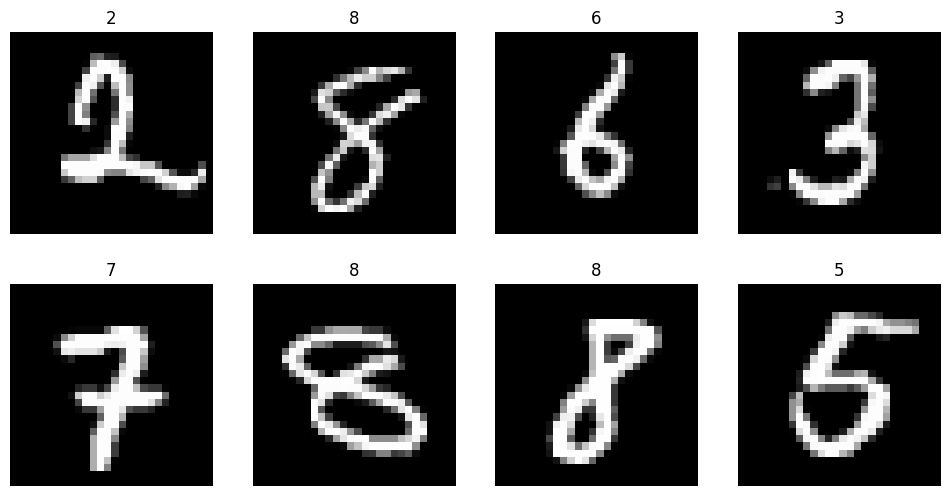

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4,2
for i in range(1,cols * rows + 1):
  sample_idx = torch.randint(len(trainset), size=(1,)).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap='gray')
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [ ]:
import torch.nn as nn

`nn.Linear` 계층 예제

In [ ]:
# nn.Linear(input_dim,output_dim) pytorch 선형회귀 모델, 입력되는 x의 차원과 출력되는 y의 차원을 입력
input = torch.randn(128,20)
print(input)

m = nn.Linear(20,30)
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[ 0.2744, -0.7651,  0.3319,  ..., -0.4097, -2.3145,  0.3584],
        [-0.9021,  1.0990, -0.8728,  ..., -0.4665,  0.4242, -1.4146],
        [-0.2631,  1.2388,  0.7050,  ..., -0.3192,  0.0159, -0.2347],
        ...,
        [-0.9690,  1.0381, -0.0131,  ..., -0.6832, -1.4833,  0.3687],
        [ 0.8253,  1.5540, -1.0016,  ...,  0.8170, -0.8498, -0.8085],
        [ 0.4671,  0.1293,  1.4346,  ..., -0.2107, -1.6870,  0.3028]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[-1.7962e+00, -2.8405e-01, -3.8420e-02,  ..., -2.0587e-01,
         -4.8469e-01, -1.3830e-01],
        [-6.8887e-02,  1.1188e+00, -3.1695e-01,  ..., -1.0452e-01,
          8.2539e-03, -1.3344e-01],
        [-6.7397e-01,  1.5835e-01,  1.3818e-01,  ...,  9.7971e-02,
         -1.4637e-01,  1.6103e-03],
        ...,
        [ 9.8996e-02,  4.7947e-01, -5.6879e-01,  ..., -7.6009e-03,
         -1.2785e-01,  6.8679e-01],
        [-4.8354e-02, -5.3721e-01,  3.7750e-01,  ...,  9.6037e-01,
          9.1557e-01, -

`nn.Conv2d` 계층 예시


위 예제의 dilation은 (4, 2) 입니다. 즉, Input과 계산되는 kernel에서 한 픽셀에서 바로 옆의 픽셀 까지의 height 방향으로 4칸 이동해야 하고 width 방향으로 2칸 이동해야 한다는 뜻입니다.
이와 같은 방법을 사용하는 이유는 receptive field를 넓히기 위함입니다. 즉, kernel이 한번에 넓은 영역을 보고 학습할 수 있다는 뜻입니다.
만약 dilation이 (1, 1)이면 kernel의 receptive field는 (3, 3)이지만 위 처럼 (4, 2)의 dilation을 적용하면 (4 * (3 - 1) + 1, 2 * (3 - 1) + 1) = (9, 5)가 됩니다.

https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1

dilation은 kernel의 한 픽셀에서 다른 픽셀 까지의 거리를 나타냅니다.

```python
m = nn.Conv2d(16, 33, 3, stride=2)
```
이 줄은 입력 채널 개수가 16이고 출력 채널 개수가 33인 2D 합성곱 레이어를 생성합니다. 이 레이어는 커널 크기가 3x3이며 stride가 2인 것을 의미합니다. 즉, 입력 이미지에 대해 3x3 커널을 사용하여 합성곱을 수행하고, 커널을 2 픽셀씩 이동시킵니다. 이 작업은 이미지의 공간적 특징을 추출하는 데 사용됩니다.

```python
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
```
이 줄은 위와 동일한 입력과 출력 채널 개수를 가진 2D 합성곱 레이어를 생성합니다. 다만, 이번에는 커널 크기가 3x5로 다르며, stride와 padding 값도 다르게 설정되어 있습니다. stride=(2, 1)은 수평 방향으로 2 픽셀, 수직 방향으로 1 픽셀 이동하는 것을 의미합니다. padding=(4, 2)는 입력 이미지 주변에 4개의 수평 픽셀과 2개의 수직 픽셀을 추가하여 입력 이미지의 크기를 유지하는 것을 의미합니다. 이러한 매개변수 설정은 커널의 크기와 이동 방식을 더 세밀하게 제어하고, 입력 이미지 주변에 패딩을 추가하여 출력 크기를 조정하는 데 사용됩니다.

```python
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
```
마지막 줄에서는 위와 동일한 매개변수를 가지는 합성곱 레이어를 생성하되, dilation=(3, 1)으로 설정되었습니다. dilation은 커널 내부의 픽셀 간 간격을 제어하는 매개변수로, dilation 값이 1일 경우 픽셀 간의 간격이 1로 유지됩니다. 하지만 dilation 값이 1보다 큰 경우 픽셀 간 간격이 넓어지며, 이는 커널이 입력 이미지에 적용되는 영역을 넓히는 효과를 줍니다. 이를 통해 더 넓은 영역에 대한 정보를 포착할 수 있습니다.

이 코드는 합성곱 신경망을 구성할 때 커널 크기, stride, padding, dilation 등의 매개변수를 조정하여 다양한 효과와 성능을 얻을 수 있습니다. 예를 들어, 작은 커널 크기와 큰 stride를 사용하면 입력 이미지의 크기를 더 작게 줄일 수 있으며, padding을 추가하여 출력 크기를 조정할 수 있습니다. 또한 dilation을 조정하여 합성곱 레이어의 수용 영역을 확장하고 더 넓은 영역의 정보를 포착할 수도 있습니다. 이러한 기능을 통해 합성곱 신경망을 다양한 이미지 처리 작업에 적용할 수 있습니다.

In [ ]:
m = nn.Conv2d(16,33,3,stride=2)
m = nn.Conv2d(16,33,(3,5), stride=(2,1), padding=(4,2))
m = nn.Conv2d(16,33,(3,5), stride=(2,1), padding=(4,2), dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [ ]:
input = torch.randn(20,16,50,100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [ ]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈

In [ ]:
nn.Conv2d(in_channels=1, out_channels=20,kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

`weight` 확인

In [ ]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

`weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [ ]:
weight = weight.detach()

In [ ]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

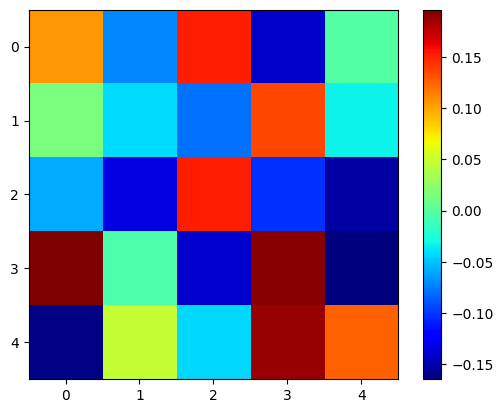

In [ ]:
plt.imshow(weight[0,0,:,:], 'jet')
plt.colorbar()
plt.show()

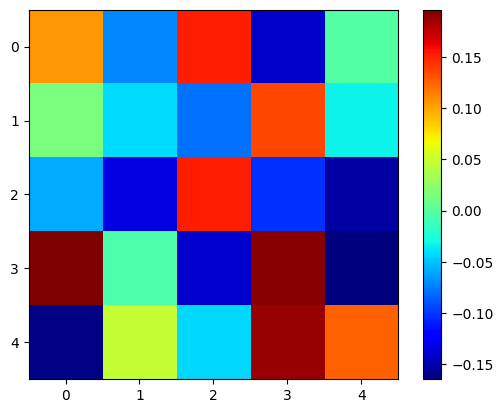

In [ ]:
plt.imshow(weight[0,0,:,:], 'jet')
plt.colorbar()
plt.show()

In [ ]:
# mnist image
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [ ]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size()) # 흑백 사진 1장

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

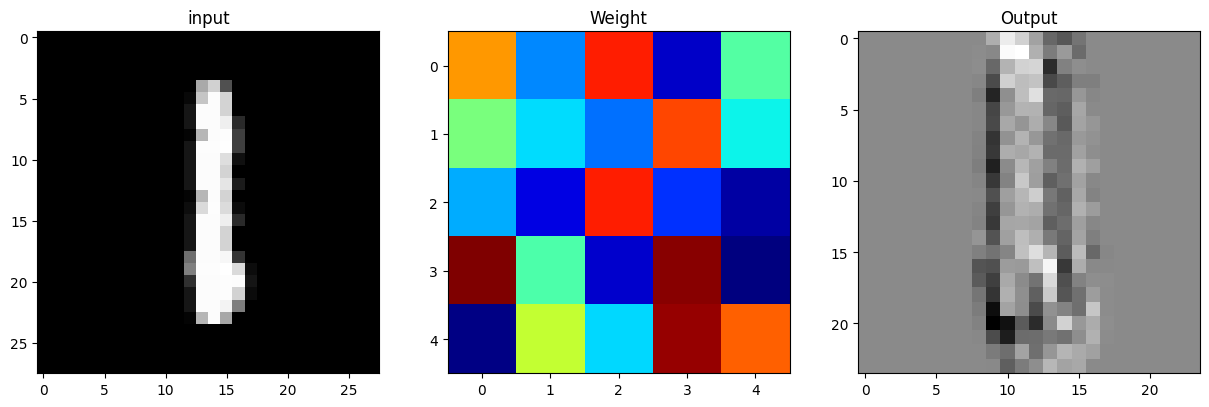

In [ ]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title("input")
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0,0,:,:],'jet')

plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0,0,:,:],'gray')
plt.show()

### 풀링 레이어(Pooling layers)

- `F.max_pool2d`
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용

In [ ]:
import torch.nn.functional as F
pool = F.max_pool2d(output,2,2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [ ]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

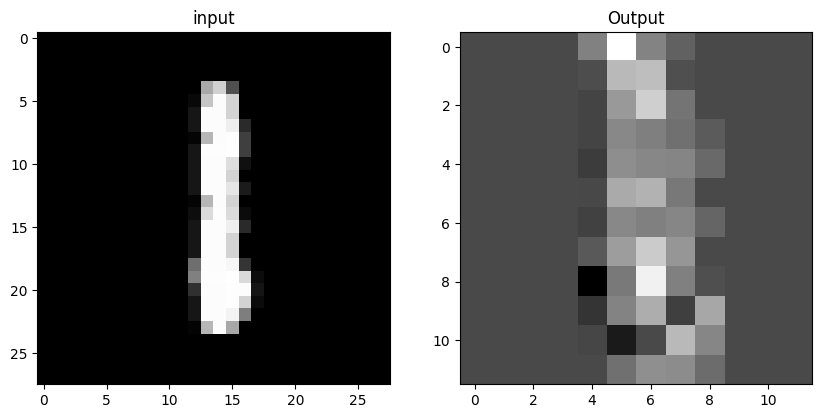

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title("input")
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title("Output")
plt.imshow(pool_arr[0,0,:,:],'gray')
plt.show()

### 선형 레이어(Linear layers)

1d만 가능하므로 `.view()`를 통해 1d로 펼쳐줘야함

In [ ]:
flatten = input_image.view(1,28 * 28)
flatten.shape

torch.Size([1, 784])

In [ ]:
lin = nn.Linear(784,10)(flatten) # in_feature 784, out_feature 10
lin.shape

torch.Size([1, 10])

In [ ]:
lin

tensor([[ 0.1219, -0.0298,  0.3220,  0.5564,  0.2184,  0.4950,  0.2441,  0.0133,
         -0.1268, -0.0181]], grad_fn=<AddmmBackward0>)

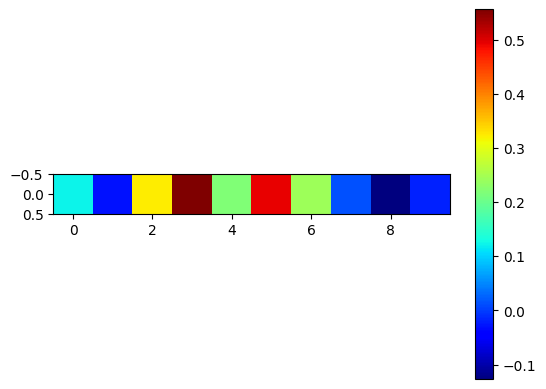

In [ ]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### 비선형 활성화 (Non-linear Activations)

`F.softmax`와 같은 활성화 함수 등

In [ ]:
with torch.no_grad():
  flatten = input_image.view(1,28 * 28)
  lin = nn.Linear(784,10)(flatten)
  softmax = F.softmax(lin,dim=1)

softmax

tensor([[0.0916, 0.0831, 0.1886, 0.1039, 0.1246, 0.0834, 0.0688, 0.0701, 0.0775,
         0.1085]])

In [ ]:
import numpy as np
np.sum(softmax.numpy())

0.99999994

`F.relu`

- ReLU 함수를 적용하는 레이어
- `nn.ReLU`로도 사용 가능

In [ ]:
inputs = torch.randn(4,3,28,28).to(device) # 컬러 이미지 4장
inputs.shape

torch.Size([4, 3, 28, 28])

In [ ]:
layer = nn.Conv2d(3,20,5,1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## 모델 정의


### `nn.Module` 상속 클래스 정의
- `nn.Module`을 상속받는 클래스 정의
- `__init__()`: 모델에서 사용될 모듈과 활성화 함수 등을 정의
- `forward()`: 모델에서 실행되어야 하는 연산을 정의

In [ ]:
from torch import nn

class Model(nn.Module):
  def __init__(self, inputs):
    super(Model, self).__init__()
    self.layer = nn.Linear(inputs,1)
    self.activation = nn.Sigmoid()

  def forward(self,x):
    x = self.layer(x)
    x = self.activation(x)
    return x

In [ ]:
model = Model(1)
print(list(model.children())) # 계층을 보여줌
print()
print(list(model.modules())) # 모듈의 내용을 보여줌

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]

[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


### `nn.Sequential`을 이용한 신경망 정의
- `nn.Sequential` 객체로 그 안에 각 모듈을 순차적으로 실행
- `__init__()`에서 사용할 네트워크 모델들을 `nn.Sequential`로 정의 가능
- `forward()`에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30,kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10,bias=True),
        nn.ReLU(inplace=True),
    )


    def forward(self,x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = x.view(x.shape[0], -1)
      x = self.layer3(x)
      return x



In [ ]:
model = Model()
print(list(model.children()),'\n')
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)] 

[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
 

### 파이토치 사전학습 모델

* https://pytorch.org/vision/stable/models.html

## 모델 파라미터


### 손실 함수(Loss function)

* 예측 값과 실제 값 사이의 오차 측정
* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* 파이토치의 주요 손실 함수
  - `torch.nn.BCELoss`: 이진 분류를 위해 사용
  - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `torch.nn.MSELoss`: 회귀 모델에서 사용

In [ ]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()

### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* optimizer는 `step()`을 통해 전달받은 파라미터를 모델 업데이트
* 모든 옵티마이저의 기본으로 `torch.optim.Optimizer(params, defaults)` 클래스 사용
* `zero_grad()`를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
* `torch.optim.lr_scheduler`를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
* 파이토치의 주요 옵티마이저: `optim.Adadelta`, `optim.Adagrad`, `optim.Adam`, `optim.RMSprop`, `optim.SGD`

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C">

### 학습률 스케줄러(Learning rate scheduler)

* 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
* 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
* 파이토치의 학습률 스케줄러 종류
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용해 그 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
  - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시켜 학습률이 커지기도 하고 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화

### 모델 학습

In [ ]:
epochs = 100
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()

  y_pred = model(X)
  loss = criterion(y_pred, y)
  losses.append(loss.item())
  loss.backward() # 역전파 수행, 자동 미분 결과 업데이트

  optimizer.step() # 옵티마이저 스탭을 다음으로 진행

## FashionMNIST 분류 모델

GPU 설정

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### 데이터 로드

In [ ]:
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))]) # 평균, 표준편차

In [ ]:
trainset = datasets.FashionMNIST(root='/content/',
                                 train=True, download=True,
                                 transform=transform)
testset = datasets.FashionMNIST(root='/content/',
                                 train=False, download=True,
                                 transform=transform)

100%|██████████| 26421880/26421880 [00:00<00:00, 114723843.22it/s]


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 4843305.26it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 65114395.12it/s]


Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20312584.19it/s]


Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [ ]:
!ls

drive  FashionMNIST  MNIST  sample_data


In [ ]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2) # default 값은 0인데 data 로딩을 위해 몇 개의 서브 프로세스를 사용할 것인지를 결정
test_loader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

In [ ]:
# iter는 반복 가능한 객체에서 이터레이터를 반환하고, next는 이터레이터에서 값을 차례대로 꺼냄.
images, labels = next(iter(train_loader)) # 데이터의 접근하려면 python 의 내장함수 iter 와 next 을 사용하여 접근
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

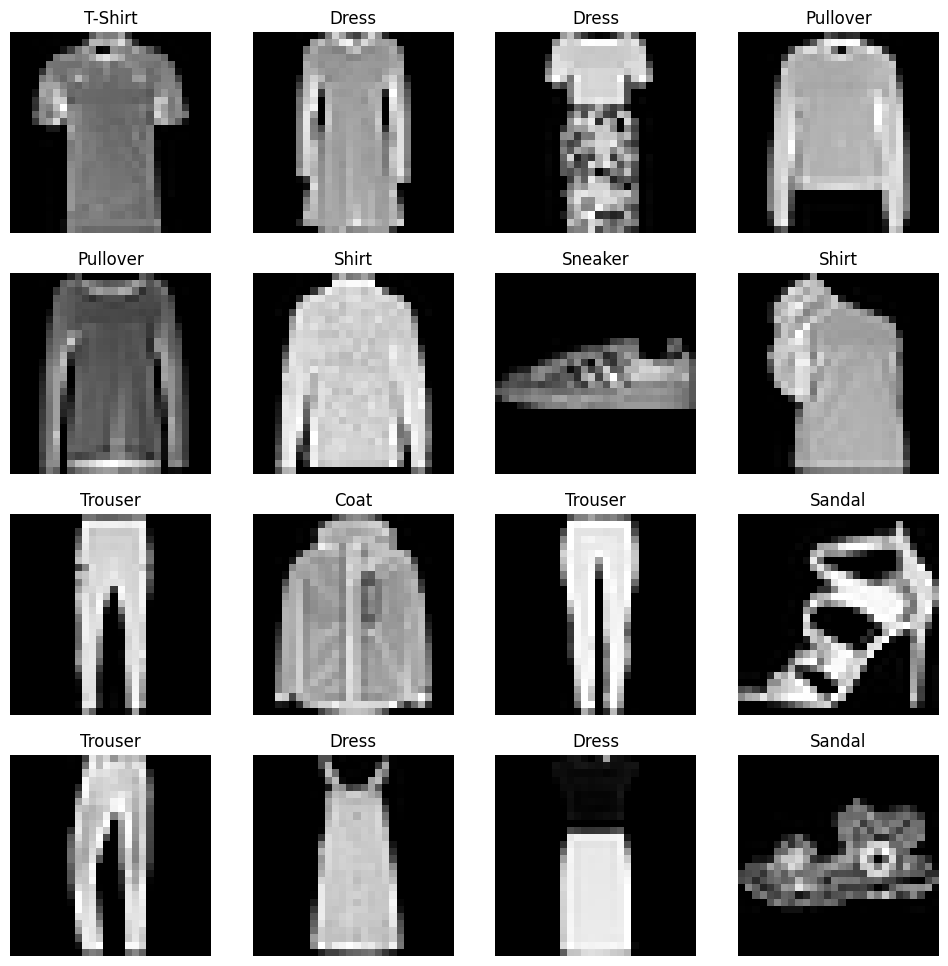

In [ ]:
import matplotlib.pyplot as plt
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot',

}

figure = plt.figure(figsize=(12,12))
cols, rows = 4,4
for i in range(1,cols * rows + 1):
  image = images[i].squeeze()
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image,cmap='gray')
plt.show()


### 모델 정의 및 파라미터

https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1

dilation은 kernel의 한 픽셀에서 다른 픽셀까지의 거리를 나타냅니다.

nn.Linear
- 선형 계층은 저장된 가중치와 편향을 사용하여 입력에 선형 변환을 적용하는 모듈

nn.ReLU
- 비선형 활성화는 모델의 입력과 출력 사이에 복잡한 관계를 만든다. 비선형 활성화는 선형 변환 후에 적용되어 비선형성을 도입하고 신경망이 다양한 현상을 학습할 수 있도록 만든다.

In [ ]:
from torch import nn
from torch.nn import functional as f
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv2d_32 = nn.Conv2d(1,32,3,padding=1)
        self.conv2d_64 = nn.Conv2d(32,64,3,padding=1)
        self.max2d     = nn.MaxPool2d(2,2)
        self.conv2d_128 = nn.Conv2d(64,128,3,padding=1)
        self.conv2d_256 = nn.Conv2d(128,256,3, stride = 2,padding=1)
        self.linear1    = nn.Linear(3*3*256, 256)
        self.linear2    = nn.Linear(256,64)
        self.linear3    = nn.Linear(64,10)
        self.batch2d1     = nn.BatchNorm2d(64)
        self.batch2d2    = nn.BatchNorm2d(256)
        self.batch1d     = nn.BatchNorm1d(64)
        self.drop      = nn.Dropout(p=0.3)
        self.flat      = nn.Flatten()

    def forward(self,x):
        x = x.view(-1,1,28,28)
        x = f.relu(self.conv2d_32(x))
        x = f.relu(self.conv2d_64(x))
        x = self.batch2d1(x)
        x = f.relu(self.max2d(x))
        x = self.drop(x)

        x = f.relu(self.conv2d_128(x))
        x = f.relu(self.conv2d_256(x))
        x = self.batch2d2(x)
        x = f.relu(self.max2d(x))
        x = self.drop(x)

        x = self.flat(x)
        x = f.relu(self.linear1(x))
        x = self.drop(x)
        x = f.relu(self.linear2(x))
        x = self.drop(x)
        x = self.batch1d(x)
        x = f.log_softmax(self.linear3(x), dim=1)
        return(x)

net = net()
print(net)

net(
  (conv2d_32): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_64): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_128): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_256): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (linear1): Linear(in_features=2304, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (batch2d1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2d2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch1d): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.3, inplace=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
)


In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

20
torch.Size([32, 1, 3, 3])


https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html


### 손실함수와 옵티마이저

In [ ]:
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.008)

### 모델 학습

배치수 확인

In [ ]:
total_batch = len(train_loader)
print(total_batch)

469


zero_grad()

보통 딥러닝에서는 미니배치+루프 조합을 사용해서 parameter들을 업데이트하는데,
한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 .grad 값에 변화도가 저장이 된다.

이후 다음 루프에서 zero_grad()를 하지않고 역전파를 시키면 이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에도 간섭을 해서 원하는 방향으로 학습이 안된다고 한다.

따라서 루프가 한번 돌고나서 역전파를 하기전에 반드시 zero_grad()로 .grad 값들을 0으로 초기화시킨 후 학습을 진행해야 한다.

In [ ]:
for epoch in range(10):
  running_loss = 0.0 # 초기화

  for i, data in enumerate(train_loader,0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step() # 역전파 단계에서 계산한 기울기를 사용하여 모델을 조정

    running_loss += loss.item()
    if i % 100 == 99:
      print('Epoch:{},Iter:{}, Loss:{}'.format(epoch+1,i+1,running_loss/20000))
      running_loss = 0.0


Epoch:1,Iter:100, Loss:0.004922433018684387
Epoch:1,Iter:200, Loss:0.002966908822953701
Epoch:1,Iter:300, Loss:0.0024401908785104754
Epoch:1,Iter:400, Loss:0.002245624750852585
Epoch:2,Iter:100, Loss:0.0019408912673592568
Epoch:2,Iter:200, Loss:0.0018059656769037246
Epoch:2,Iter:300, Loss:0.0017701475694775581
Epoch:2,Iter:400, Loss:0.0017574013531208039
Epoch:3,Iter:100, Loss:0.00163116854429245
Epoch:3,Iter:200, Loss:0.001600142838805914
Epoch:3,Iter:300, Loss:0.0015403755642473698
Epoch:3,Iter:400, Loss:0.001471313225477934
Epoch:4,Iter:100, Loss:0.0014429855175316334
Epoch:4,Iter:200, Loss:0.0014222446292638778
Epoch:4,Iter:300, Loss:0.0013974323093891145
Epoch:4,Iter:400, Loss:0.0014166592493653298
Epoch:5,Iter:100, Loss:0.0013182908743619918
Epoch:5,Iter:200, Loss:0.0013699216037988662
Epoch:5,Iter:300, Loss:0.0013343665502965451
Epoch:5,Iter:400, Loss:0.0012902585282921792
Epoch:6,Iter:100, Loss:0.001264394859969616
Epoch:6,Iter:200, Loss:0.0012539432413876056
Epoch:6,Iter:300, 

### 모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드

In [ ]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(),PATH)

In [ ]:
net.parameters

<bound method Module.parameters of net(
  (conv2d_32): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_64): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_128): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_256): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (linear1): Linear(in_features=2304, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (batch2d1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2d2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch1d): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.3, inplace=False)
  (flat): Flatten(start_dim=

### 모델 테스트

In [ ]:
def imshow(image):
  image = image / 2 + 0.5
  npimg = image.numpy()

  fig = plt.figure(figsize=(16,8))
  plt.imshow(np.transpose(npimg,(1,2,0))) # rgb -> gbr
  plt.show()

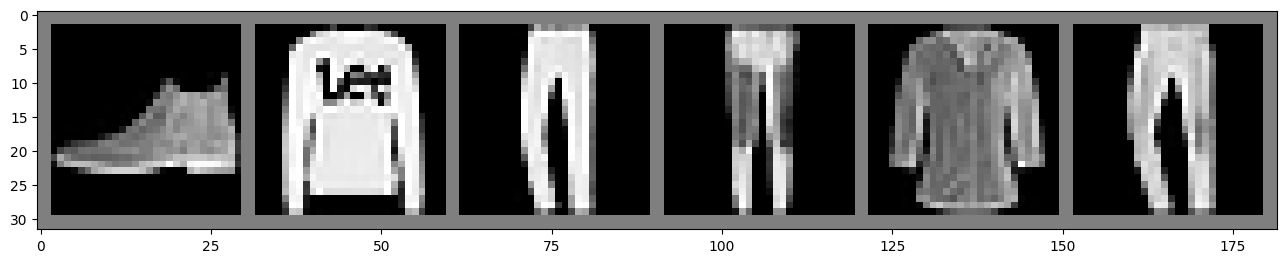

In [ ]:
import numpy as np
import torchvision

images, labels = next(iter(test_loader))

imshow(torchvision.utils.make_grid(images[:6]))

In [ ]:
# torch.max(data, dim=1) 이해
# dimension의 정보가 포함되었을때는 dimension을 기준으로 최대값을 추출해주고 이에 따른 indices 정보를 추가적으로 반환해준다. 그렇기 때문에 이때는 tuple 형태로 반환
import torch
import torch.nn as nn

data = torch.randn((5, 5))
print(data,'\n')
print(torch.max(data, dim=1))


tensor([[ 0.6495, -0.8358,  0.4562,  1.3844, -0.0977],
        [ 0.1974, -0.6683,  2.0958,  1.2323,  1.8360],
        [-0.2780,  1.4048,  0.7019,  0.4018,  0.0265],
        [-0.8840, -0.5971,  0.8388,  0.9293, -1.5424],
        [ 0.3180,  1.5008,  1.3222,  0.9191,  0.8902]]) 

torch.return_types.max(
values=tensor([1.3844, 2.0958, 1.4048, 0.9293, 1.5008]),
indices=tensor([3, 2, 1, 3, 1]))


In [ ]:
outputs = net(images)
print(outputs.shape)
_,predicted = torch.max(outputs,1) # 함수의 입력으로 dimension에 대한 정보를 포함한다면 dimension의 정보를 반영한 최대값을 반환
print(predicted, len(predicted))

torch.Size([128, 10])
tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5,
        1, 6, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 6, 9, 6, 7, 2, 1,
        2, 6, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 6, 4, 7, 8, 7, 0,
        2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8,
        0, 1, 2, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]) 128


In [ ]:
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot',

}

- predicted 배열의 요소를 반복하면서 해당 요소를 int(predicted[j].numpy())로 변환하고, labels_map에서 해당 값을 찾아 레이블을 가져옵니다.
- labels_map에서 가져온 레이블을 '{}, '.format() 형식으로 문자열로 변환합니다.
- 변환된 문자열들을 ''.join() 메서드를 사용하여 하나의 문자열로 결합합니다.
- 최종적으로 결합된 문자열을 print() 함수를 사용하여 출력합니다.

In [ ]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Ankle Boot, Pullover, Trouser, Trouser, Shirt, Trouser, 


모델 성능 평가

- correct = 0 및 total = 0은 변수를 초기화
- torch.no_grad()는 PyTorch의 컨텍스트 매니저로, 연산 그래프를 추적하지 않도록 하는데 성능 평가 단계에서는 모델의 가중치 업데이트가 필요하지 않기 때문에, 메모리 사용량을 줄이고 속도를 향상시키는 데 도움이 된다.
- for data in test_loader: 테스트 데이터로더는 모델을 평가하는 데 사용되는 이미지와 해당 레이블을 제공.
- _, predicted = torch.max(outputs.data, 1)은 모델의 예측 출력에서 가장 큰 값과 해당 인덱스를 추출. torch.max 함수는 주어진 텐서의 최댓값과 그에 상응하는 인덱스를 반환. 여기서 1은 첫 번째 차원을 따라 최댓값을 찾는 것을 의미.
- total += labels.size(0)은 배치 내의 이미지 수를 total에 추가. labels.size(0)은 현재 배치의 이미지 수.
- (predicted == labels).sum().item()은 정확하게 분류된 예측 수를 계산. (predicted == labels)는 예측된 레이블과 실제 레이블을 비교하여 일치하는 경우 True를 반환. .sum().item()은 True 값의 개수를 세어 정확하게 분류된 예측 수를 계산.
- correct += (predicted == labels).sum().item()는 정확하게 분류된 예측 수를 correct에 추가.
- print(100 * correct / total)은 전체적인 정확도를 계산하여 출력

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs.data,1) # dim (int) – the dimension to reduce.
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(100 * correct / total)

90.94


PyTorch를 사용하여 FashionMNIST 데이터셋에 대해 분류 문제를 해결하는 딥 러닝 모델을 학습
- 데이터셋 및 데이터 로더 설정: torchvision을 사용하여 FashionMNIST 훈련 세트와 테스트 세트를 로드하고 텐서로 변환합니다. 데이터 로더는 주어진 배치 크기에 따라 데이터를 로드하고, 훈련 세트의 경우 데이터를 섞습니다.

- 신경망 정의: net이라는 이름의 커스텀 CNN 모델을 정의합니다. 이 모델은 여러 개의 합성곱 레이어, 배치 정규화, 드롭아웃, 최대 풀링, 완전 연결 레이어로 구성되어 있습니다. forward 함수는 입력 텐서가 네트워크를 통과하는 방식을 정의합니다.

- 손실 함수 및 최적화기 설정: 손실 함수로 크로스 엔트로피 손실을 사용하고, 최적화기로는 Adam을 사용합니다.

- 모델 학습: 모델은 지정된 epoch 동안 훈련됩니다. 각 배치에서, 모델은 이미지를 전달하고 결과를 계산한 다음, 손실을 계산하고 역전파를 사용하여 모델의 파라미터를 업데이트합니다. 훈련 과정에서는 모델의 손실이 출력됩니다.

- 모델 평가: model.eval()을 사용하여 모델을 평가 모드로 전환한 후, 테스트 세트의 이미지를 통해 모델을 실행하고 예측을 생성합니다. 이 예측은 실제 레이블과 비교되어 모델의 정확도를 계산합니다.



In [ ]:
import torch
from torch import nn
from torch.nn import functional as f
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.FashionMNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv2d_32 = nn.Conv2d(1,32,3,padding=1)
        self.conv2d_64 = nn.Conv2d(32,64,3,padding=1)
        self.max2d     = nn.MaxPool2d(2,2)
        self.conv2d_128 = nn.Conv2d(64,128,3,padding=1)
        self.conv2d_256 = nn.Conv2d(128,256,3, stride = 2,padding=1)
        self.linear1    = nn.Linear(3*3*256, 256)
        self.linear2    = nn.Linear(256,64)
        self.linear3    = nn.Linear(64,10)
        self.batch2d1     = nn.BatchNorm2d(64)
        self.batch2d2    = nn.BatchNorm2d(256)
        self.batch1d     = nn.BatchNorm1d(64)
        self.drop      = nn.Dropout(p=0.3)
        self.flat      = nn.Flatten()

    def forward(self,x):
        x = x.view(-1,1,28,28)
        x = f.relu(self.conv2d_32(x))
        x = f.relu(self.conv2d_64(x))
        x = self.batch2d1(x)
        x = f.relu(self.max2d(x))
        x = self.drop(x)

        x = f.relu(self.conv2d_128(x))
        x = f.relu(self.conv2d_256(x))
        x = self.batch2d2(x)
        x = f.relu(self.max2d(x))
        x = self.drop(x)

        x = self.flat(x)
        x = f.relu(self.linear1(x))
        x = self.drop(x)
        x = f.relu(self.linear2(x))
        x = self.drop(x)
        x = self.batch1d(x)
        x = f.log_softmax(self.linear3(x), dim=1)
        return(x)

model = net().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Epoch [1/10], Step [100/600], Loss: 0.7651
Epoch [1/10], Step [200/600], Loss: 0.6270
Epoch [1/10], Step [300/600], Loss: 0.6527
Epoch [1/10], Step [400/600], Loss: 0.3779
Epoch [1/10], Step [500/600], Loss: 0.4142
Epoch [1/10], Step [600/600], Loss: 0.3393
Epoch [2/10], Step [100/600], Loss: 0.3712
Epoch [2/10], Step [200/600], Loss: 0.4709
Epoch [2/10], Step [300/600], Loss: 0.2967
Epoch [2/10], Step [400/600], Loss: 0.3796
Epoch [2/10], Step [500/600], Loss: 0.2503
Epoch [2/10], Step [600/600], Loss: 0.2860
Epoch [3/10], Step [100/600], Loss: 0.2389
Epoch [3/10], Step [200/600], Loss: 0.4047
Epoch [3/10], Step [300/600], Loss: 0.2279
Epoch [3/10], Step [400/600], Loss: 0.2562
Epoch [3/10], Step [500/600], Loss: 0.3242
Epoch [3/10], Step [600/600], Loss: 0.2041
Epoch [4/10], Step [100/600], Loss: 0.3387
Epoch [4/10], Step [200/600], Loss: 0.3320
Epoch [4/10], Step [300/600], Loss: 0.1565
Epoch [4/10], Step [400/600], Loss: 0.2352
Epoch [4/10], Step [500/600], Loss: 0.2741
Epoch [4/10

This refactored version makes the following improvements:

1. Organized imports and followed PEP 8 naming conventions.
2. Defined hyperparameters, dataset, and data loaders at the beginning.
3. Separated the model definition and training code into separate sections.
4. Used the `nn.Module` inheritance to define the neural network model.
5. Utilized more descriptive variable names and added comments for clarity.
6. Applied batch normalization after each convolutional layer for better performance.
7. Moved the activation functions inside the model's `forward` method.
8. Incorporated the `to(device)` method to move tensors to the GPU (if available).
9. Used the `nn.functional` module for activation and loss functions.
10. Applied dropout regularization to improve generalization.
11. Improved the printing format for training progress.
12. Added an evaluation step after training to calculate test accuracy.

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=transform)

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1)
        self.fc1 = nn.Linear(3 * 3 * 256, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
        self.batch_norm1 = nn.BatchNorm2d(64)
        self.batch_norm2 = nn.BatchNorm2d(256)
        self.batch_norm3 = nn.BatchNorm1d(64)
        self.dropout = nn.Dropout(p=0.3)
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = self.batch_norm1(x)
        x = nn.functional.relu(x)
        x = self.maxpool(x)
        x = self.dropout(x)

        x = self.conv3(x)
        x = nn.functional.relu(x)
        x = self.conv4(x)
        x = self.batch_norm2(x)
        x = nn.functional.relu(x)
        x = self.maxpool(x)
        x = self.dropout(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        x = self.batch_norm3(x)
        x = self.fc3(x)
        x = nn.functional.log_softmax(x, dim=1)

        return x

model = Net().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

# Evaluate the model
model.eval()  # Evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {:.2f}%'.format(100 * correct / total))


Epoch [1/10], Step [100/600], Loss: 0.6693
Epoch [1/10], Step [200/600], Loss: 0.4787
Epoch [1/10], Step [300/600], Loss: 0.4137
Epoch [1/10], Step [400/600], Loss: 0.4233
Epoch [1/10], Step [500/600], Loss: 0.2828
Epoch [1/10], Step [600/600], Loss: 0.2866
Epoch [2/10], Step [100/600], Loss: 0.3545
Epoch [2/10], Step [200/600], Loss: 0.4486
Epoch [2/10], Step [300/600], Loss: 0.4474
Epoch [2/10], Step [400/600], Loss: 0.3177
Epoch [2/10], Step [500/600], Loss: 0.2664
Epoch [2/10], Step [600/600], Loss: 0.2066
Epoch [3/10], Step [100/600], Loss: 0.2386
Epoch [3/10], Step [200/600], Loss: 0.2493
Epoch [3/10], Step [300/600], Loss: 0.3479
Epoch [3/10], Step [400/600], Loss: 0.2486
Epoch [3/10], Step [500/600], Loss: 0.4303
Epoch [3/10], Step [600/600], Loss: 0.2632
Epoch [4/10], Step [100/600], Loss: 0.2616
Epoch [4/10], Step [200/600], Loss: 0.1710
Epoch [4/10], Step [300/600], Loss: 0.1608
Epoch [4/10], Step [400/600], Loss: 0.2497
Epoch [4/10], Step [500/600], Loss: 0.1758
Epoch [4/10

Keras 적용

https://codetorial.net/tensorflow/fashion_mnist_classification.html

In [ ]:
import tensorflow as tf

# 1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print(train_images[0])
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# 2. 데이터 전처리
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# 3. 모델 구성
# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 5. 모델 훈련
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 2ms/step - loss: 0.4750 - accuracy: 0.8311
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3597 - accuracy: 0.8674
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3195 - accuracy: 0.8824
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2965 - accuracy: 0.8888
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2789 - accuracy: 0.8962


In [ ]:
# 6. 정확도 평가하기
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3462 - accuracy: 0.8741
0.34621313214302063 0.8741000294685364


In [ ]:
# 7. 예측하기
import numpy as np
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

313/313 [==============================] - 0s 1ms/step
[6.8136904e-07 3.3192805e-07 1.4423989e-08 4.9851780e-09 4.8095126e-07
 3.1638793e-03 5.1695127e-07 2.3462404e-02 1.9753688e-08 9.7337174e-01]
9
